In [ ]:
!pip install ultralytics

from google.colab import drive
drive.mount('/content/drive')

import ultralytics
ultralytics.checks()

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.1/107.7 GB disk)


In [ ]:
!unzip "/content/drive/MyDrive/Soil_Segmentation_Dataset/Soil detection.v3i.yolov11.zip" -d "/content/Soil_Segmentation_Dataset"

Archive:  /content/drive/MyDrive/Soil_Segmentation_Dataset/Soil detection.v3i.yolov11.zip
  inflating: /content/Soil_Segmentation_Dataset/README.dataset.txt  
  inflating: /content/Soil_Segmentation_Dataset/README.roboflow.txt  
  inflating: /content/Soil_Segmentation_Dataset/data.yaml  
   creating: /content/Soil_Segmentation_Dataset/test/
   creating: /content/Soil_Segmentation_Dataset/test/images/
 extracting: /content/Soil_Segmentation_Dataset/test/images/Black_38_jpg.rf.cce2afe5e739cb1d77fbdfd7d51d5012.jpg  
 extracting: /content/Soil_Segmentation_Dataset/test/images/Black_44_jpg.rf.bfb078e5b0304edb36b2cc1d57ea3cbc.jpg  
 extracting: /content/Soil_Segmentation_Dataset/test/images/Black_47_jpg.rf.30fa0ac078480d4fbb2bdb6bd4c189c3.jpg  
 extracting: /content/Soil_Segmentation_Dataset/test/images/Clay_47_jpg.rf.75ea8b632fb8f5e1a540b31945d9ff4d.jpg  
 extracting: /content/Soil_Segmentation_Dataset/test/images/Copy-of-clay-soil-cropped_jpg.rf.9dfcef24065c2fa79a282f89bff22b80.jpg  
 extr

In [ ]:
!ls "/content"

drive  runs  Soil_Segmentation_Dataset	yolo11n.pt


In [ ]:
!ls "/content/Soil_Segmentation_Dataset"

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
from ultralytics import YOLO

DATA_YAML = '/content/Soil_Segmentation_Dataset/data.yaml'

# Load YOLOv11 nano segmentation model
model = YOLO("yolo11n.pt")

# Train the model
model.train(
    data=DATA_YAML,
    epochs=100,
    imgsz=640,
    batch=16,
    name="yolo_soil_seg"
)

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Soil_Segmentation_Dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_soil_seg2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspec

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b8773087860>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
!ls '/content/runs/segment/yolo_soil_seg/weights'

In [ ]:
!ls /content/runs

detect


In [ ]:
!ls /content/runs/detect

yolo_soil_seg  yolo_soil_seg2


In [ ]:
!ls /content/runs/detect/yolo_soil_seg/weights

In [ ]:
!ls /content/runs/detect/yolo_soil_seg2

args.yaml			 labels.jpg	      train_batch1.jpg
BoxF1_curve.png			 results.csv	      train_batch2.jpg
BoxP_curve.png			 results.png	      val_batch0_labels.jpg
BoxPR_curve.png			 train_batch0.jpg     val_batch0_pred.jpg
BoxR_curve.png			 train_batch1170.jpg  val_batch1_labels.jpg
confusion_matrix_normalized.png  train_batch1171.jpg  val_batch1_pred.jpg
confusion_matrix.png		 train_batch1172.jpg  weights


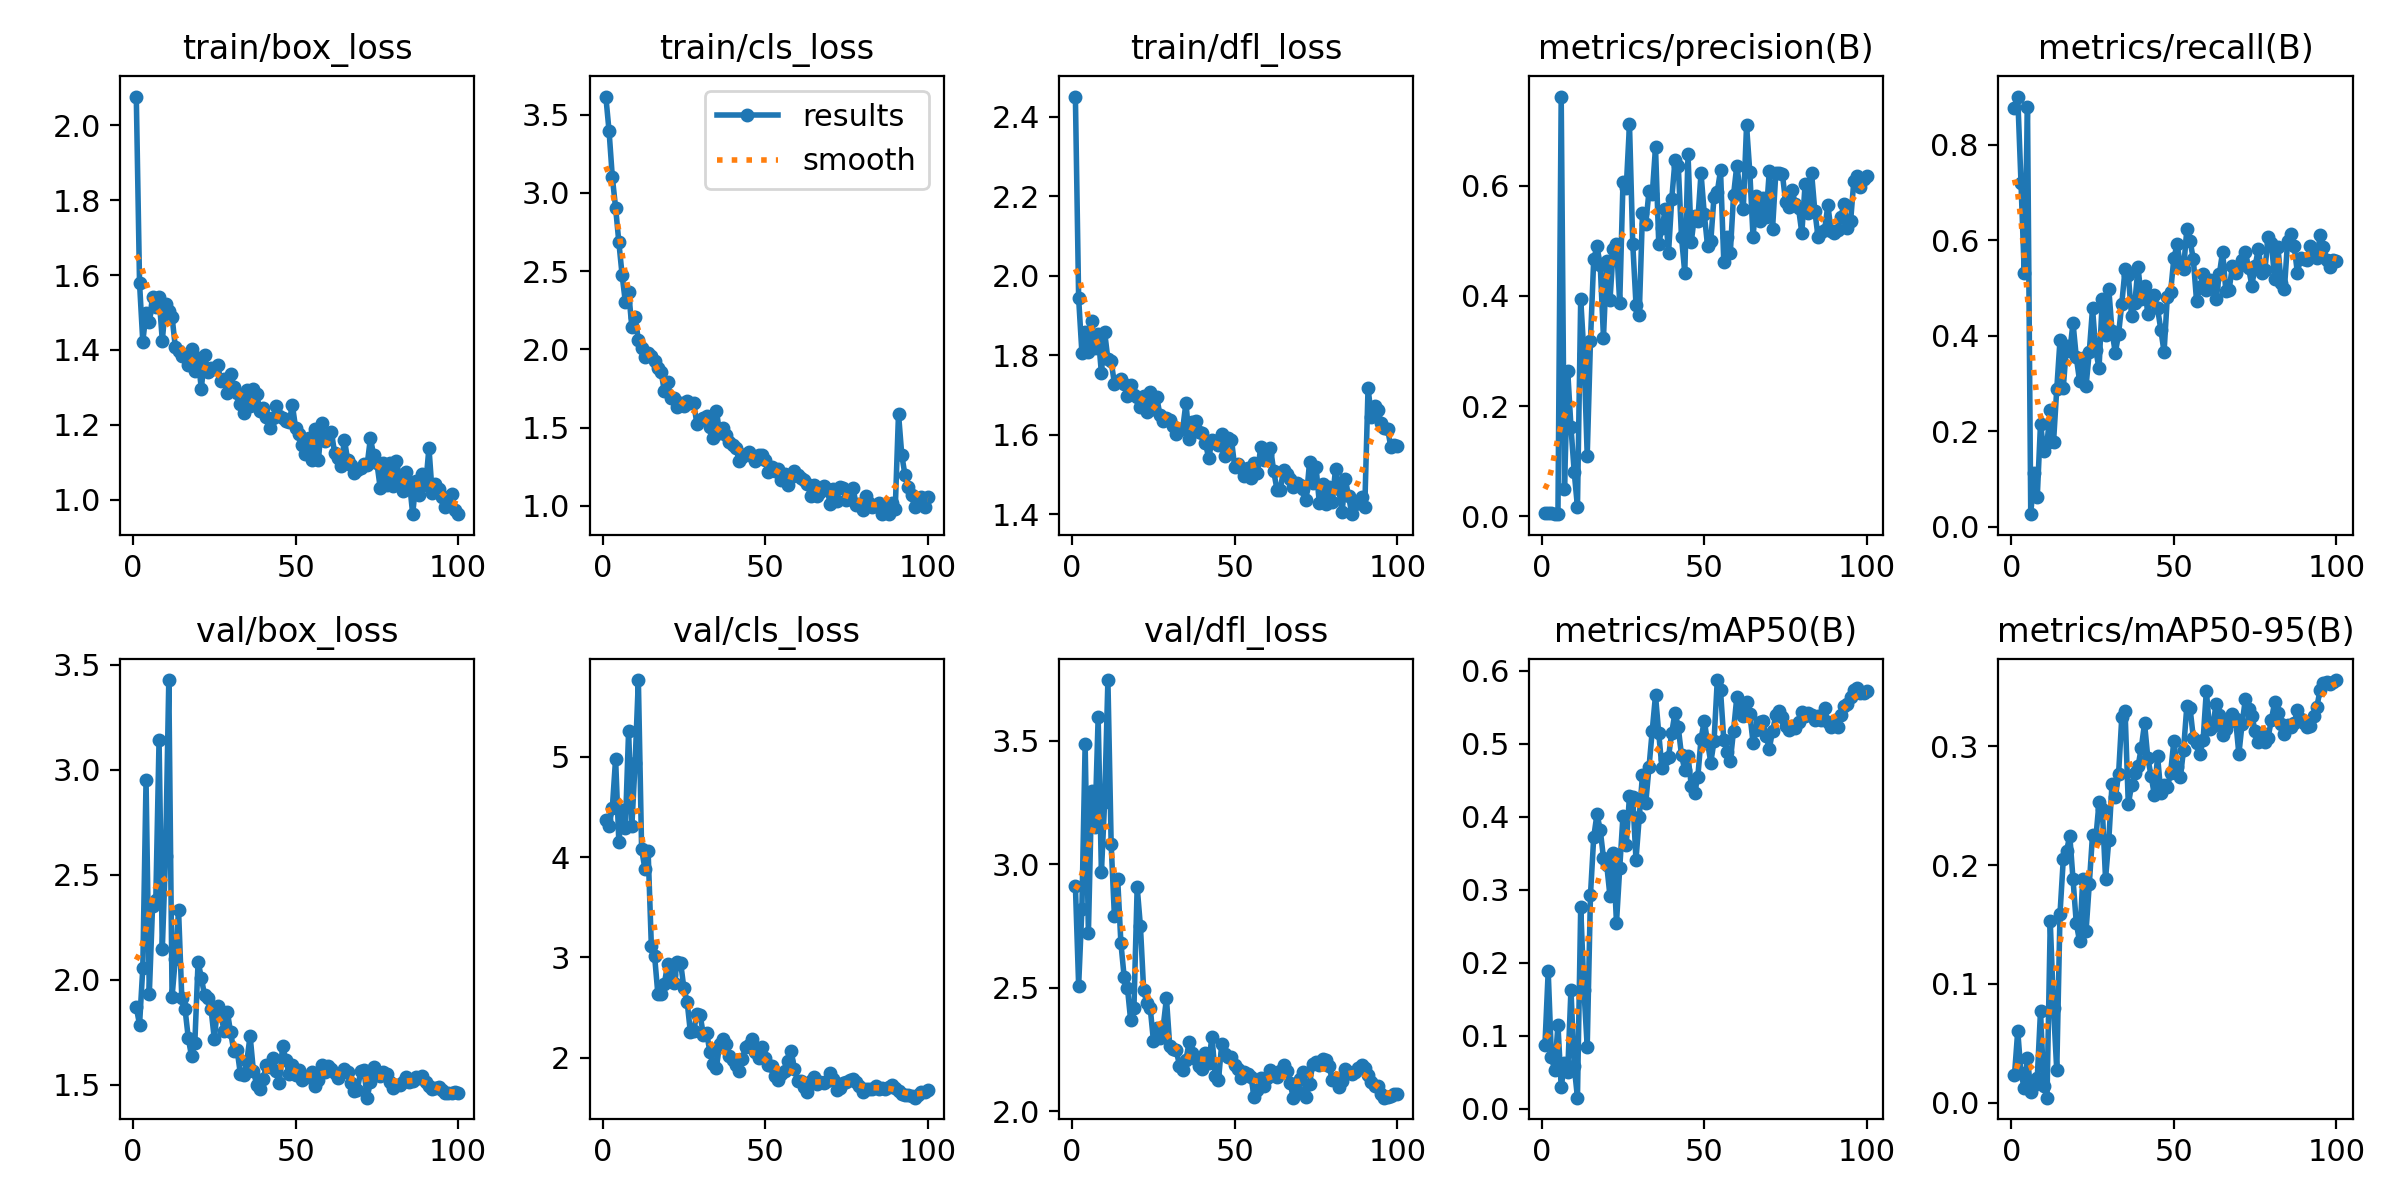

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/runs/detect/yolo_soil_seg2/results.png', width=800))

In [ ]:
import pandas as pd

data = {
    "Class": ["Alluvial Soil", "Black Soil", "Clay Soil", "Red Soil"],
    "Images": [18, 17, 9, 15],
    "Instances": [21, 21, 11, 19],
    "Precision": [0.419, 0.856, 0.449, 0.429],
    "Recall": [0.571, 0.857, 0.227, 0.474],
    "mAP50": [0.583, 0.85, 0.313, 0.477],
    "mAP50-95": [0.313, 0.542, 0.203, 0.329]
}

df = pd.DataFrame(data)
df["F1"] = 2 * (df["Precision"] * df["Recall"]) / (df["Precision"] + df["Recall"])
df = df.round(3)
df

,Class,Images,Instances,Precision,Recall,mAP50,mAP50-95,F1
0,Alluvial Soil,18,21,0.419,0.571,0.583,0.313,0.483
1,Black Soil,17,21,0.856,0.857,0.850,0.542,0.856
2,Clay Soil,9,11,0.449,0.227,0.313,0.203,0.302
3,Red Soil,15,19,0.429,0.474,0.477,0.329,0.450


In [ ]:
!ls /content/runs/detect/yolo_soil_seg2/weights

best.pt  last.pt


In [ ]:
!yolo task=detect mode=val \
  model="/content/runs/detect/yolo_soil_seg2/weights/best.pt" \
  data="/content/Soil_Segmentation_Dataset/data.yaml" \
  imgsz=640

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1846.1±642.7 MB/s, size: 76.1 KB)
val: Scanning /content/Soil_Segmentation_Dataset/valid/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 58/58 647.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.2it/s 21.0s
                   all         58         72      0.616      0.556      0.571      0.356
         Alluvial Soil         18         21      0.471      0.524      0.451      0.251
            Black Soil         17         21      0.881       0.81      0.857      0.556
             Clay Soil          9         11      0.539      0.364      0.425      0.287
              Red Soil         15         19      0.575      0.526      0.551      0.328
Speed: 11.8ms preprocess, 33

In [ ]:
!yolo task=detect mode=predict \
  model="/content/runs/detect/yolo_soil_seg2/weights/best.pt" \
  source="/content/Soil_Segmentation_Dataset/test/images" \
  conf=0.25 \
  save=True

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

image 1/28 /content/Soil_Segmentation_Dataset/test/images/Black_38_jpg.rf.cce2afe5e739cb1d77fbdfd7d51d5012.jpg: 640x640 1 Black Soil, 303.3ms
image 2/28 /content/Soil_Segmentation_Dataset/test/images/Black_44_jpg.rf.bfb078e5b0304edb36b2cc1d57ea3cbc.jpg: 640x640 1 Black Soil, 239.3ms
image 3/28 /content/Soil_Segmentation_Dataset/test/images/Black_47_jpg.rf.30fa0ac078480d4fbb2bdb6bd4c189c3.jpg: 640x640 1 Black Soil, 217.7ms
image 4/28 /content/Soil_Segmentation_Dataset/test/images/Clay_47_jpg.rf.75ea8b632fb8f5e1a540b31945d9ff4d.jpg: 640x640 1 Clay Soil, 235.8ms
image 5/28 /content/Soil_Segmentation_Dataset/test/images/Copy-of-clay-soil-cropped_jpg.rf.9dfcef24065c2fa79a282f89bff22b80.jpg: 640x640 1 Clay Soil, 204.9ms
image 6/28 /content/Soil_Segmentation_Dataset/test/images/Copy-of-image14_jpeg.rf.4e376475395c1adc2faba2ce

In [ ]:
import glob
for img_path in glob.glob('/content/runs/segment/predict/*.jpg')[:10]:
    display(Image(filename=img_path, height=500))

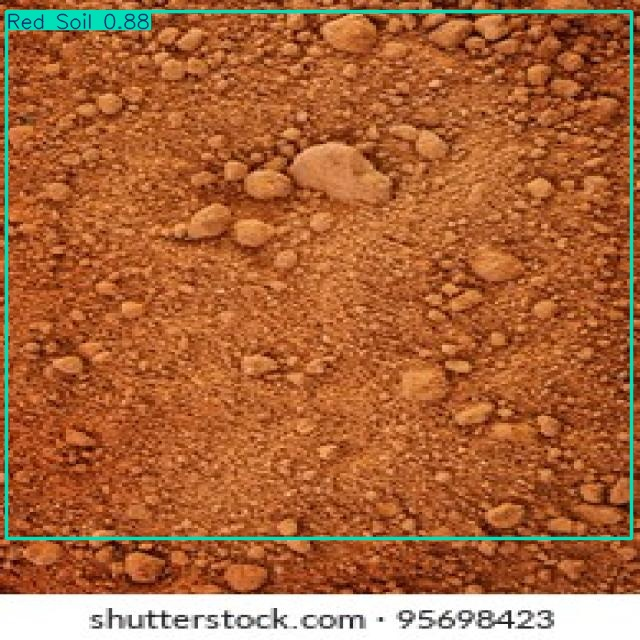

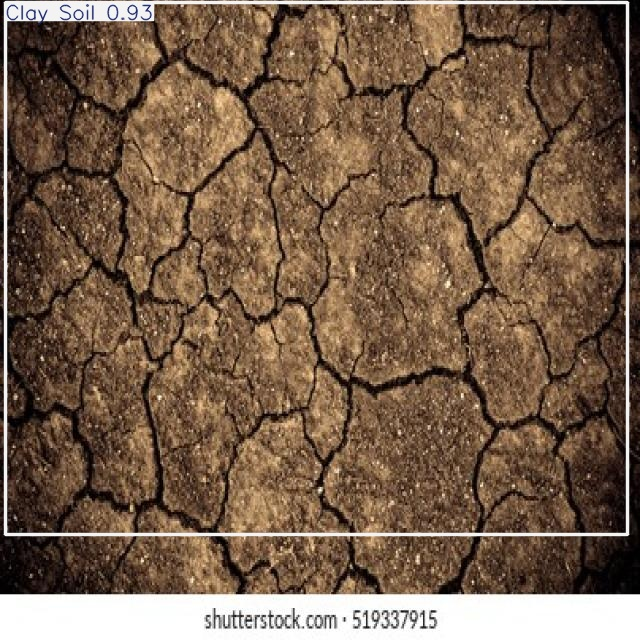

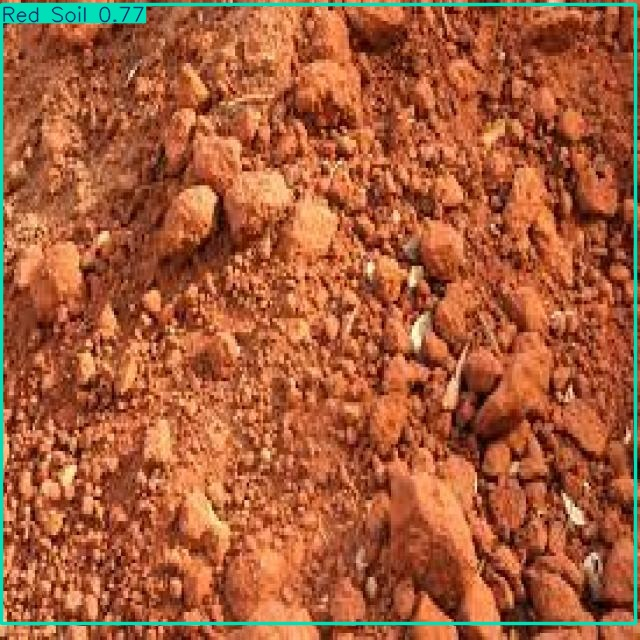

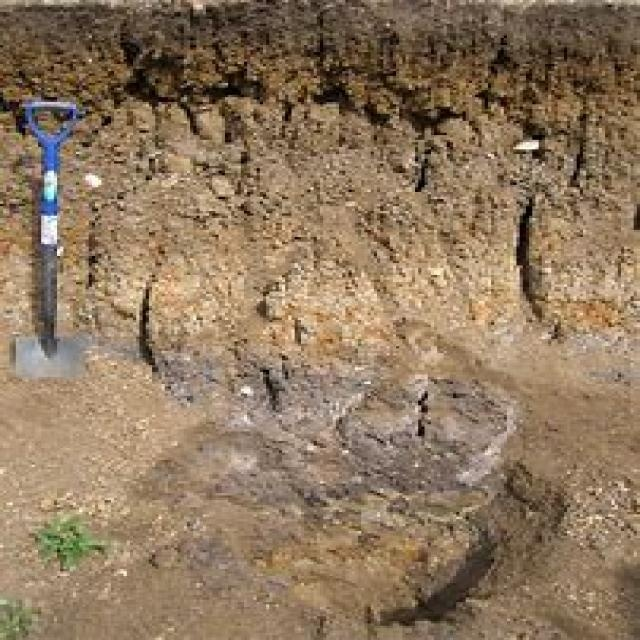

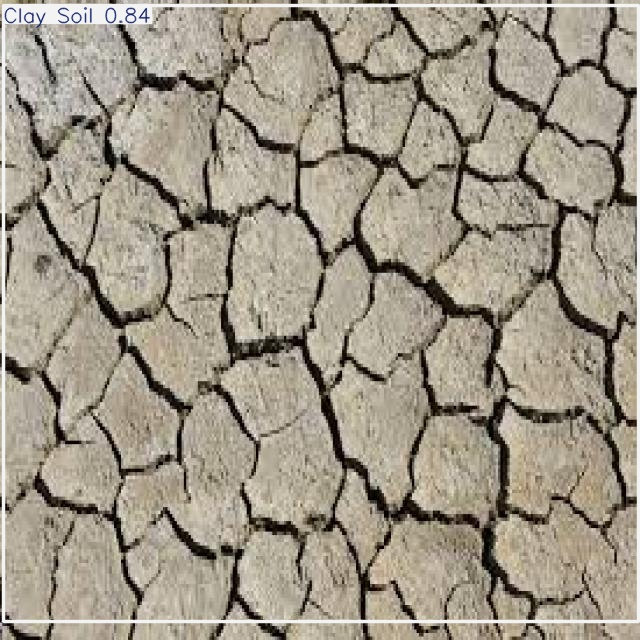

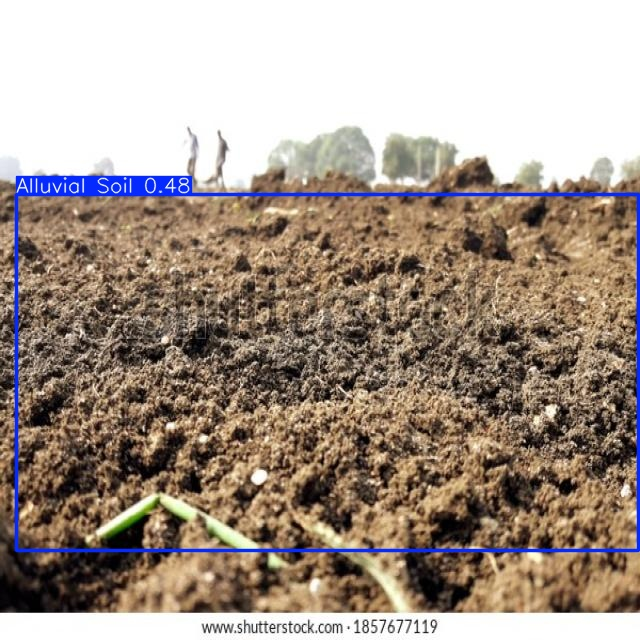

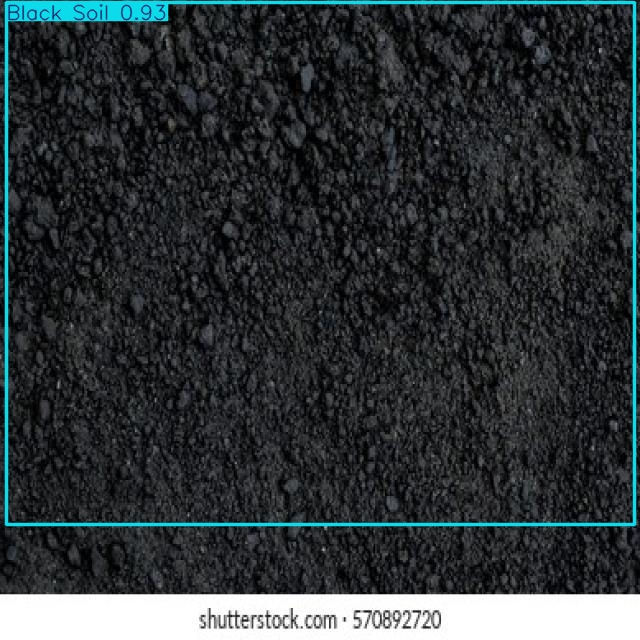

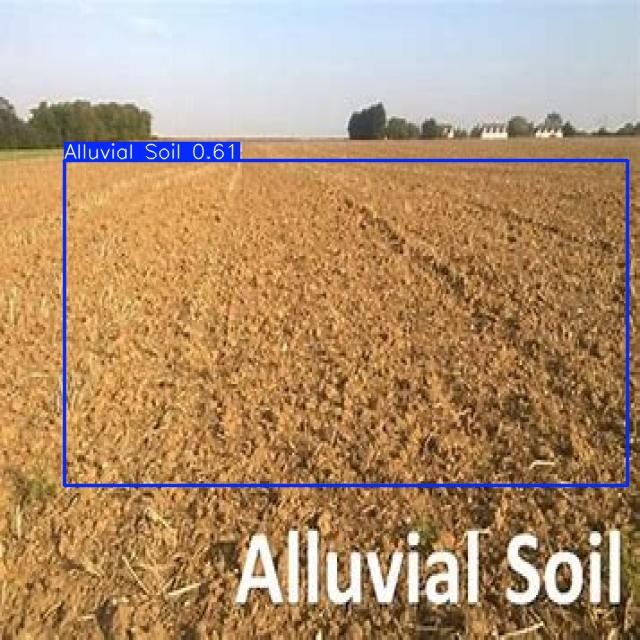

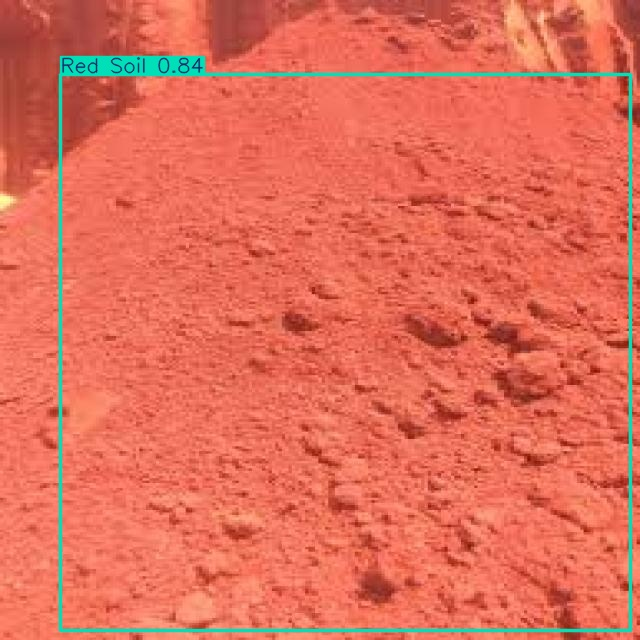

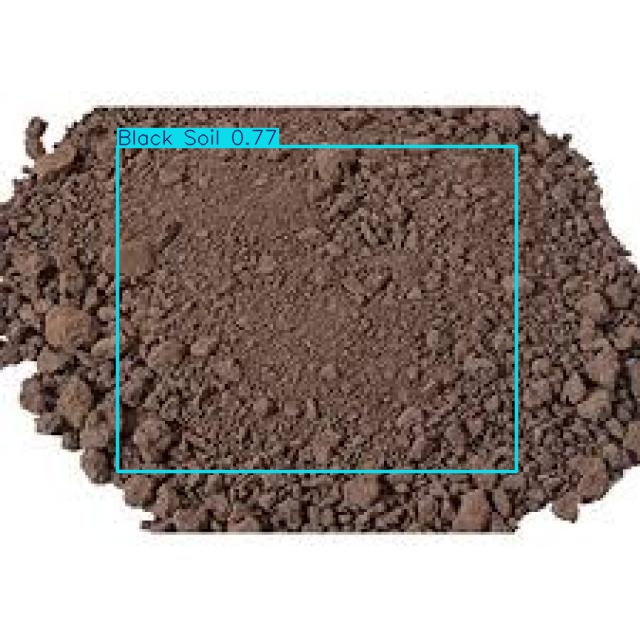

In [ ]:
from IPython.display import Image, display
import glob

# Display first 5 predicted images
for img_path in glob.glob('/content/runs/detect/predict/*.jpg')[:10]:
    display(Image(filename=img_path, height=600))

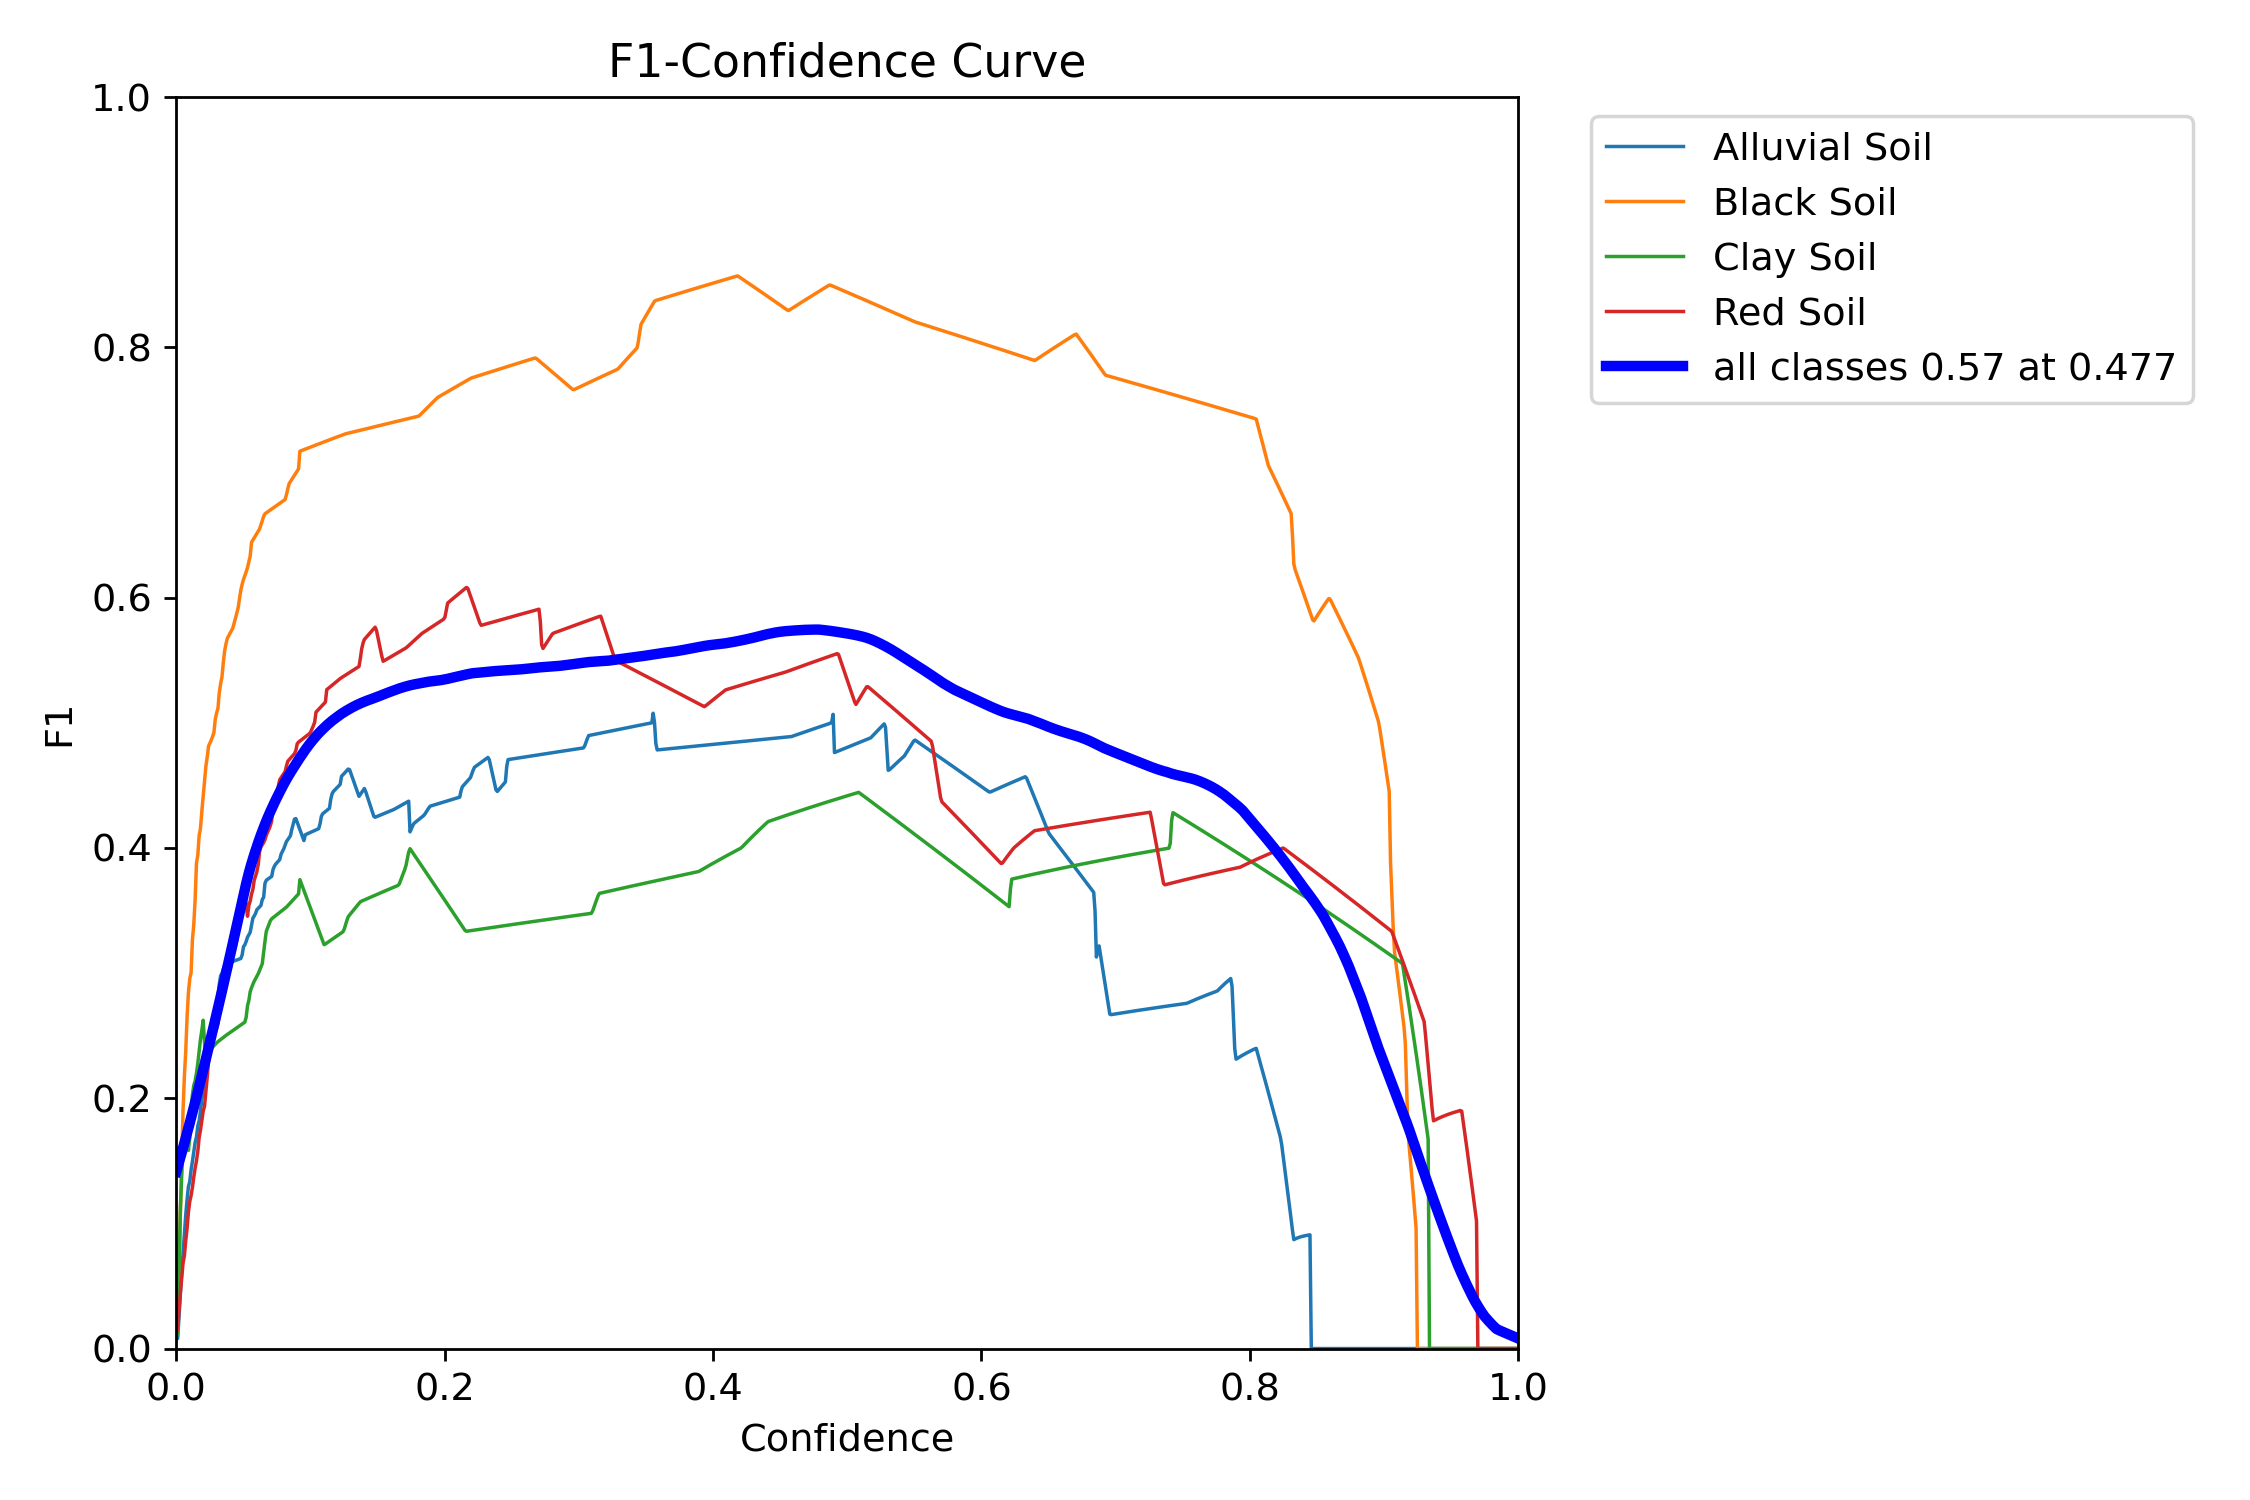

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/runs/detect/yolo_soil_seg2/BoxF1_curve.png', width=800))

In [ ]:
import shutil, os

drive_dir = "/content/drive/MyDrive/Soil detection.v2i.yolov11/trained_weights"
os.makedirs(drive_dir, exist_ok=True)

shutil.copy(
    "/content/runs/detect/yolo_soil_seg2/weights/best.pt",
    os.path.join(drive_dir, "yolo_soil_seg_best.pt")
)

print("✅ Model successfully saved to Google Drive!")


✅ Model successfully saved to Google Drive!


In [ ]:
# 1️⃣ Create the target directory
!mkdir -p /content/AI_DRIVEN_ARCHAEOLOGICAL_SITE_MAPPING_PLATFORM/models

# 2️⃣ Copy your trained YOLO weights to the models folder
!cp runs/detect/yolo_soil_seg2/weights/best.pt /content/AI_DRIVEN_ARCHAEOLOGICAL_SITE_MAPPING_PLATFORM/models/
!cp runs/detect/yolo_soil_seg2/weights/last.pt /content/AI_DRIVEN_ARCHAEOLOGICAL_SITE_MAPPING_PLATFORM/models/

# 3️⃣ Verify that the files are copied correctly
!ls /content/AI_DRIVEN_ARCHAEOLOGICAL_SITE_MAPPING_PLATFORM/models/

best.pt  last.pt


In [ ]:
# 4️⃣ Download both model files to your computer
from google.colab import files
files.download('/content/AI_DRIVEN_ARCHAEOLOGICAL_SITE_MAPPING_PLATFORM/models/best.pt')
files.download('/content/AI_DRIVEN_ARCHAEOLOGICAL_SITE_MAPPING_PLATFORM/models/last.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('/content/AI_DRIVEN_ARCHAEOLOGICAL_SITE_MAPPING_PLATFORM/models/last.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>